            page_views
date                  
2016-05-09        3412
2016-05-10        2836
2016-05-11        3891
2016-05-12        2665
2016-05-13        1383
            page_views
date                  
2016-05-09        3412
2016-05-10        2836
2016-05-11        3891
2016-05-12        2665
2016-05-13        1383
count    1239.000000
mean     2988.640839
std      1110.170915
min      1093.000000
25%      1990.000000
50%      3033.000000
75%      3942.000000
max      4899.000000
Name: page_views, dtype: float64
year
2016    2981.529148
2017    2986.148997
2018    3018.118156
2019    2964.350000
Name: page_views, dtype: float64
year  month
2016  5        2614.750000
      6        3081.535714
      7        3195.448276
      8        3538.275862
      9        2555.433333
      10       2912.000000
      11       2920.766667
      12       2938.034483
2017  1        2965.586207
      2        3031.148148
      3        2974.785714
      4        3174.571429
      5        2869.806

C:\Users\mp12y\AppData\Local\Temp\ipykernel_4652\3706367900.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year'] = df_cleaned.index.year
C:\Users\mp12y\AppData\Local\Temp\ipykernel_4652\3706367900.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['month'] = df_cleaned.index.month
C:\Users\mp12y\AppData\Local\Temp\ipykernel_4652\3706367900.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

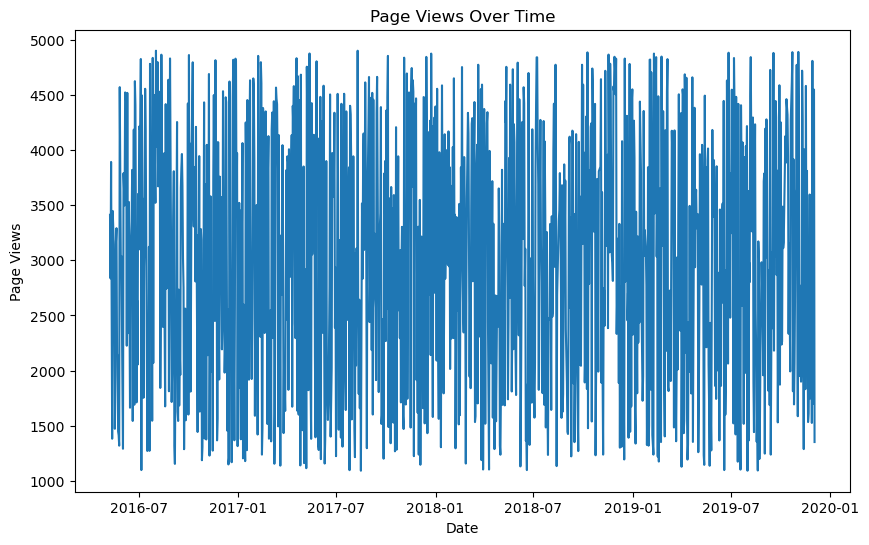

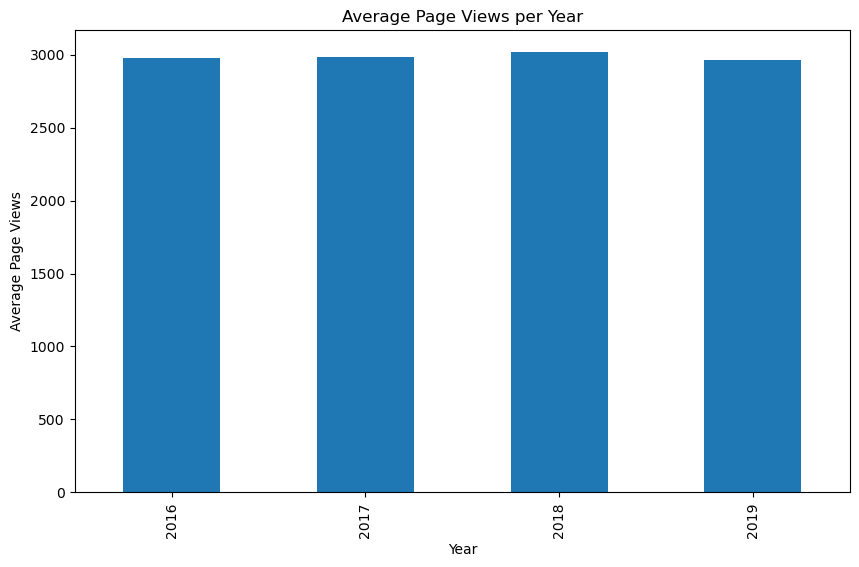

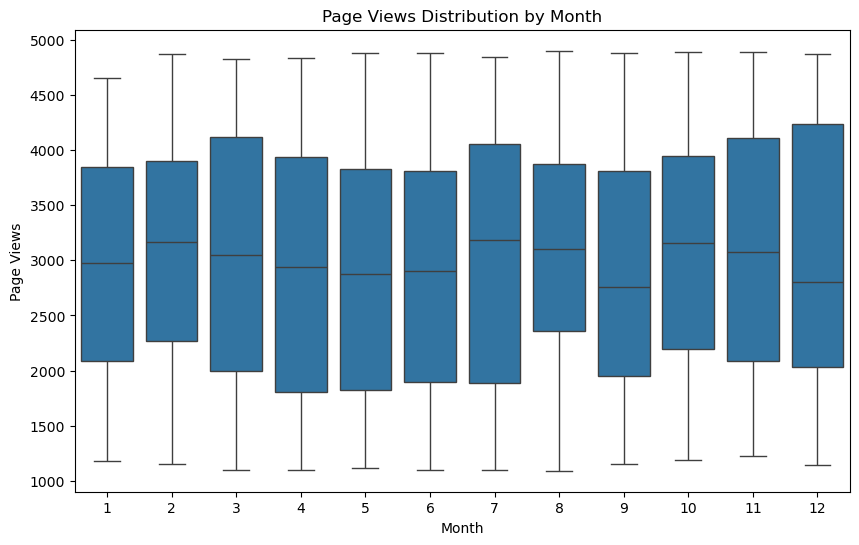

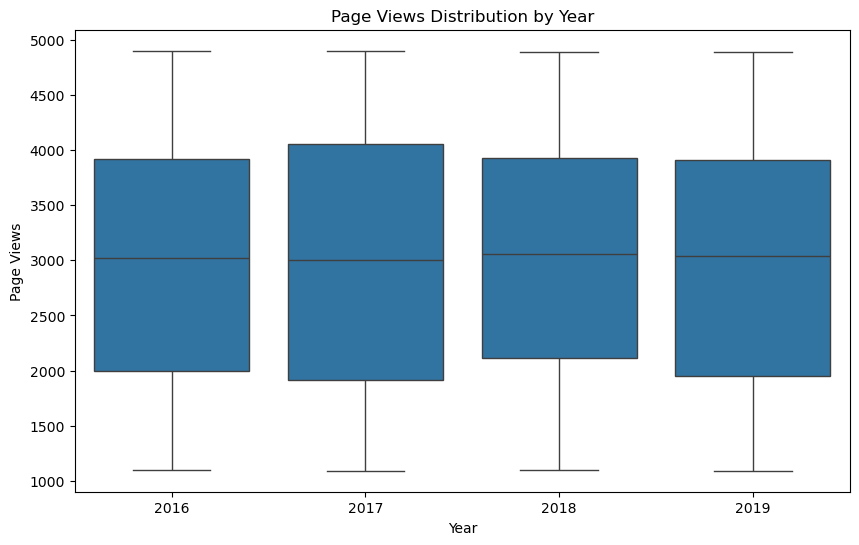

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

print(df.head())

lower_percentile = df['page_views'].quantile(0.025)
upper_percentile = df['page_views'].quantile(0.975)

df_cleaned = df[(df['page_views'] >= lower_percentile) & (df['page_views'] <= upper_percentile)]

print(df_cleaned.head())

print(df_cleaned['page_views'].describe())

df_cleaned['year'] = df_cleaned.index.year

df_grouped_by_year = df_cleaned.groupby('year')['page_views'].mean()

print(df_grouped_by_year)

df_cleaned['month'] = df_cleaned.index.month

df_grouped_by_month = df_cleaned.groupby(['year', 'month'])['page_views'].mean()

print(df_grouped_by_month)

df_cleaned['sqrt_page_views'] = np.sqrt(df_cleaned['page_views'])

print(df_cleaned.head())

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_cleaned.index, df_cleaned['page_views'])
plt.title('Page Views Over Time')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

df_grouped_by_year.plot(kind='bar', figsize=(10, 6))
plt.title('Average Page Views per Year')
plt.xlabel('Year')
plt.ylabel('Average Page Views')
plt.show()

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='page_views', data=df_cleaned)
plt.title('Page Views Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Page Views')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='page_views', data=df_cleaned)
plt.title('Page Views Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Page Views')
plt.show()

df_cleaned.to_csv('cleaned_fcc_forum_pageviews.csv', index=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
print(df.head())

lower_percentile = df['page_views'].quantile(0.025)
upper_percentile = df['page_views'].quantile(0.975)

df_cleaned = df[(df['page_views'] >= lower_percentile) & (df['page_views'] <= upper_percentile)]

def draw_line_plot():
    plt.figure(figsize=(10, 6))
    plt.plot(df_cleaned.index, df_cleaned['page_views'])
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.show()

draw_line_plot()

df_cleaned['year'] = df_cleaned.index.year
df_cleaned['month'] = df_cleaned.index.month

df_monthly_avg = df_cleaned.groupby(['year', 'month'])['page_views'].mean().unstack()

def draw_bar_plot():
    df_monthly_avg.plot(kind='bar', figsize=(10, 6))
    plt.title('Average Monthly Page Views')
    plt.xlabel('Year')
    plt.ylabel('Average Page Views')
    plt.legend(title='Month', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

draw_bar_plot()

def draw_box_plot():
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='year', y='page_views', data=df_cleaned)
    plt.title('Year-wise Box Plot (Trend)')
    plt.xlabel('Year')
    plt.ylabel('Page Views')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='month', y='page_views', data=df_cleaned)
    plt.title('Month-wise Box Plot (Seasonality)')
    plt.xlabel('Month')
    plt.ylabel('Page Views')
    plt.show()

draw_box_plot()

def save_visualizations():
    plt.figure(figsize=(10, 6))
    plt.plot(df_cleaned.index, df_cleaned['page_views'])
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.savefig('line_plot.png')

    df_monthly_avg.plot(kind='bar', figsize=(10, 6))
    plt.title('Average Monthly Page Views')
    plt.xlabel('Year')
    plt.ylabel('Average Page Views')
    plt.savefig('bar_plot.png')

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='year', y='page_views', data=df_cleaned)
    plt.title('Year-wise Box Plot (Trend)')
    plt.xlabel('Year')
    plt.ylabel('Page Views')
    plt.savefig('year_box_plot.png')

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='month', y='page_views', data=df_cleaned)
    plt.title('Month-wise Box Plot (Seasonality)')
    plt.xlabel('Month')
    plt.ylabel('Page Views')
    plt.savefig('month_box_plot.png')

save_visualizations()